In [1]:
# pip install tensorflow

### Importing relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error
scaler = MinMaxScaler()
sns.set_theme()

### Loading train and test data

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df_train = pd.read_csv('train.csv')
df_train.describe(include='all')

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,5760.000000,5760,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760,5760,5760
unique,NaN,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,NaN,08/05/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autumn,No Holiday,Yes
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1440,5520,5513
mean,2879.500000,NaN,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302,NaN,NaN,NaN
std,1662.913107,NaN,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728,NaN,NaN,NaN
min,0.000000,NaN,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,1439.750000,NaN,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,2879.500000,NaN,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,4319.250000,NaN,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000,NaN,NaN,NaN


In [5]:
df_train["timestamp"] = pd.to_datetime(df_train["Date"],format="%d/%m/%Y")
df_train[['timestamp']]

,timestamp
0,2017-12-01
1,2017-12-01
2,2017-12-01
3,2017-12-01
4,2017-12-01
...,...
5755,2018-11-20
5756,2018-11-20
5757,2018-11-20
5758,2018-11-20


In [6]:
df_train[['timestamp']]

,timestamp
0,2017-12-01
1,2017-12-01
2,2017-12-01
3,2017-12-01
4,2017-12-01
...,...
5755,2018-11-20
5756,2018-11-20
5757,2018-11-20
5758,2018-11-20


In [7]:
df_train['Functioning Day'].value_counts()

Yes    5513
No      247
Name: Functioning Day, dtype: int64

In [8]:
df_train['Functioning Day'].value_counts(normalize=True)

Yes    0.957118
No     0.042882
Name: Functioning Day, dtype: float64

In [9]:
df_test=pd.read_csv('test.csv')
df_test

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,5760,21/12/2017,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes
1,5761,21/12/2017,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,Winter,No Holiday,Yes
2,5762,21/12/2017,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,Winter,No Holiday,Yes
3,5763,21/12/2017,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,Winter,No Holiday,Yes
4,5764,21/12/2017,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
2996,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2997,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2998,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
df_test["timestamp"] = pd.to_datetime(df_test["Date"],format="%d/%m/%Y")
df_test[['timestamp']]

,timestamp
0,2017-12-21
1,2017-12-21
2,2017-12-21
3,2017-12-21
4,2017-12-21
...,...
2995,2018-11-30
2996,2018-11-30
2997,2018-11-30
2998,2018-11-30


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         3000 non-null   int64         
 1   Date                       3000 non-null   object        
 2   Hour                       3000 non-null   int64         
 3   Temperature(�C)            3000 non-null   float64       
 4   Humidity(%)                3000 non-null   int64         
 5   Wind speed (m/s)           3000 non-null   float64       
 6   Visibility (10m)           3000 non-null   int64         
 7   Dew point temperature(�C)  3000 non-null   float64       
 8   Solar Radiation (MJ/m2)    3000 non-null   float64       
 9   Rainfall(mm)               3000 non-null   float64       
 10  Snowfall (cm)              3000 non-null   float64       
 11  Seasons                    3000 non-null   object        
 12  Holida

In [12]:
df_test['Functioning Day'].value_counts()

Yes    2952
No       48
Name: Functioning Day, dtype: int64

### Exploratory data analysis

In [13]:
df_train.isna().sum()

ID                           0
Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
timestamp                    0
dtype: int64

In [14]:
df_test.isna().sum()

ID                           0
Date                         0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
timestamp                    0
dtype: int64

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'Hour'}>],
       [<AxesSubplot:title={'center':'Temperature(�C)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Wind speed (m/s)'}>],
       [<AxesSubplot:title={'center':'Visibility (10m)'}>,
        <AxesSubplot:title={'center':'Dew point temperature(�C)'}>,
        <AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>],
       [<AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Snowfall (cm)'}>, <AxesSubplot:>]],
      dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


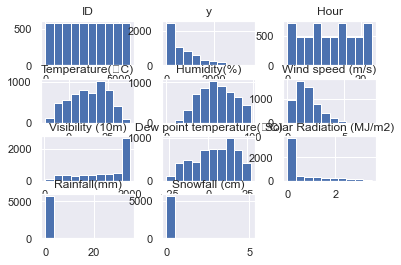

In [15]:
df_train.hist()

In [96]:
abs(df_train.corr()['y'].sort_values(ascending=False))

y                            1.000000
Temperature(�C)              0.544281
Hour                         0.407180
Dew point temperature(�C)    0.392454
ID                           0.365359
Solar Radiation (MJ/m2)      0.250601
Visibility (10m)             0.214777
Wind speed (m/s)             0.116380
Rainfall(mm)                 0.117711
Snowfall (cm)                0.120836
Humidity(%)                  0.191603
Name: y, dtype: float64

In [98]:
df_train.columns

Index(['ID', 'Date', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'timestamp', 'y'],
      dtype='object')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


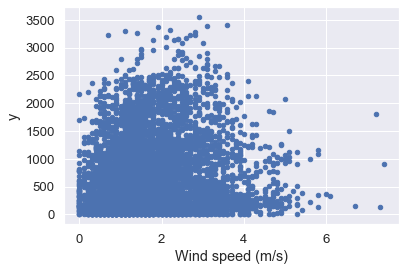

In [105]:
df_train.plot('Wind speed (m/s)', 'y',kind='scatter')
plt.show()

In [18]:
df_test.columns

Index(['ID', 'Date', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'timestamp'],
      dtype='object')

In [24]:
table=pd.crosstab(data_all['Holiday'],data_all['Functioning Day'],margins=True)
table

Functioning Day,No,Yes,All
Holiday,,,
Holiday,24,408,432
No Holiday,271,8057,8328
All,295,8465,8760


### Concatenation of train and test data to preprocess them in one shot

In [16]:
y=df_train['y'].copy()
df_train.drop(['y'],axis='columns',inplace=True)
df_train['y']=y

In [19]:
data_all = pd.concat((df_train,df_test),ignore_index=True)

In [20]:
data_all

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,timestamp,y
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,254.0
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,204.0
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,173.0
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,107.0
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,NaN
8756,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,NaN
8757,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,NaN
8758,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,NaN


In [21]:
data_all.isna().sum()

ID                              0
Date                            0
Hour                            0
Temperature(�C)                 0
Humidity(%)                     0
Wind speed (m/s)                0
Visibility (10m)                0
Dew point temperature(�C)       0
Solar Radiation (MJ/m2)         0
Rainfall(mm)                    0
Snowfall (cm)                   0
Seasons                         0
Holiday                         0
Functioning Day                 0
timestamp                       0
y                            3000
dtype: int64

In [22]:
data_all.columns

Index(['ID', 'Date', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'timestamp', 'y'],
      dtype='object')

In [23]:
data_all

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,timestamp,y
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,254.0
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,204.0
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,173.0
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,107.0
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,NaN
8756,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,NaN
8757,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,NaN
8758,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30,NaN


### Getting dummies

In [25]:
data_all['Seasons'].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [26]:
data_all['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [27]:
data_all['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [28]:
data_with_dummies= pd.get_dummies(data_all,columns=['Seasons','Holiday','Functioning Day'],drop_first=True)
data_with_dummies

,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),timestamp,y,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017-12-01,254.0,0,0,1,1,1
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017-12-01,204.0,0,0,1,1,1
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017-12-01,173.0,0,0,1,1,1
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017-12-01,107.0,0,0,1,1,1
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017-12-01,78.0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,2018-11-30,NaN,0,0,0,1,1
8756,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,2018-11-30,NaN,0,0,0,1,1
8757,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,2018-11-30,NaN,0,0,0,1,1
8758,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,2018-11-30,NaN,0,0,0,1,1


In [29]:
# y=data_with_dummies['y']
data_with_dummies.drop(['ID','Date','y', 'timestamp'],axis='columns',inplace=True)
data_with_dummies['y']=y

### Separating train data from test data

In [30]:
train_data= data_with_dummies[data_with_dummies['y'].notna()]
test_data= data_with_dummies[data_with_dummies['y'].isna()]

In [31]:
train_data.drop(['y'],axis='columns',inplace=True)
test_data.drop(['y'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
train_data.head()

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,1


In [33]:
test_data.head()

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
5760,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,0,0,1,1,1
5761,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,0,0,1,1,1
5762,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,0,0,1,1,1
5763,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,0,0,1,1,1
5764,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,0,0,1,1,1


In [34]:
train_data.describe()

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.00000,5760.00000,5760.00000,5760.000000,5760.000000
mean,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302,0.25000,0.25000,0.25000,0.958333,0.957118
std,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728,0.43305,0.43305,0.43305,0.199844,0.202609
min,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
25%,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,1.000000,1.000000
50%,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000,0.00000,0.00000,0.00000,1.000000,1.000000
75%,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000,0.25000,0.25000,0.25000,1.000000,1.000000
max,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000,1.00000,1.00000,1.00000,1.000000,1.000000


In [106]:
train_data

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,19,8.7,34,2.2,1857,-6.3,0.0,0.0,0.0,0,0,0,1,1
5756,20,8.5,32,2.6,1789,-7.2,0.0,0.0,0.0,0,0,0,1,1
5757,21,8.8,37,3.8,1750,-5.1,0.0,0.0,0.0,0,0,0,1,1
5758,22,8.9,40,3.4,1810,-3.9,0.0,0.0,0.0,0,0,0,1,1


### Converting data into arrays

In [35]:
my_data = np.array(train_data)

In [36]:
unscaled_inputs_all = my_data
targets_all = np.array(y)
targets_all.max()

3556

In [37]:
targets_all=targets_all.reshape(-1,1)

### Scaling data

In [38]:
s1 = scaler.fit(unscaled_inputs_all.astype(np.float64))
scaled_inputs = s1.transform(unscaled_inputs_all).astype(np.float64)
test_data_scaled= s1.transform(test_data).astype(np.float64)

In [39]:
s2 = scaler.fit(targets_all.astype(np.float64))
scaled_targets= s2.transform(targets_all).astype(np.float64)

### Shuffling data

In [40]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets =scaled_targets[shuffled_indices]

### Dividing data into train/validation/test

In [41]:
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.7*samples_count)
validation_samples_count = int(0.15*samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

806.0542744656918 4031 0.19996384878831353
163.79893138357704 864 0.18958209650876973
169.6482002249719 865 0.19612508696528544


### Fitting the model

In [135]:
input_size = 14
output_size = 1
hidden_layer_size = 100
    
model = tf.keras.Sequential([
   
    tf.keras.layers.Dense(hidden_layer_size, 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, 'relu'),

    tf.keras.layers.Dense(output_size, 'linear') # output layer
])




optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

model.compile(optimizer, loss='MSE')
# model.compile(optimizer='RMSProp', loss=tf.keras.losses.MeanSquaredLogarithmicError())



batch_size = 32

max_epochs = 200


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)


model.fit(train_inputs, 
          train_targets, 
          batch_size=batch_size,
          epochs=max_epochs,
          callbacks= [early_stopping],
          validation_data=(validation_inputs, validation_targets), 
          verbose = 2 
          )  

Epoch 1/200
126/126 - 1s - loss: 0.0198 - val_loss: 0.0120
Epoch 2/200
126/126 - 0s - loss: 0.0121 - val_loss: 0.0098
Epoch 3/200
126/126 - 0s - loss: 0.0113 - val_loss: 0.0123
Epoch 4/200
126/126 - 0s - loss: 0.0106 - val_loss: 0.0104
Epoch 5/200
126/126 - 0s - loss: 0.0097 - val_loss: 0.0072
Epoch 6/200
126/126 - 0s - loss: 0.0090 - val_loss: 0.0077
Epoch 7/200
126/126 - 0s - loss: 0.0087 - val_loss: 0.0073
Epoch 8/200
126/126 - 0s - loss: 0.0090 - val_loss: 0.0068
Epoch 9/200
126/126 - 0s - loss: 0.0083 - val_loss: 0.0094
Epoch 10/200
126/126 - 0s - loss: 0.0082 - val_loss: 0.0069
Epoch 11/200
126/126 - 0s - loss: 0.0079 - val_loss: 0.0079
Epoch 12/200
126/126 - 0s - loss: 0.0077 - val_loss: 0.0069
Epoch 13/200
126/126 - 0s - loss: 0.0077 - val_loss: 0.0061
Epoch 14/200
126/126 - 0s - loss: 0.0078 - val_loss: 0.0072
Epoch 15/200
126/126 - 0s - loss: 0.0074 - val_loss: 0.0065
Epoch 16/200
126/126 - 0s - loss: 0.0073 - val_loss: 0.0058
Epoch 17/200
126/126 - 0s - loss: 0.0074 - val_lo

Epoch 138/200
126/126 - 0s - loss: 0.0042 - val_loss: 0.0044
Epoch 139/200
126/126 - 0s - loss: 0.0038 - val_loss: 0.0045
Epoch 140/200
126/126 - 0s - loss: 0.0039 - val_loss: 0.0050
Epoch 141/200
126/126 - 0s - loss: 0.0039 - val_loss: 0.0047
Epoch 142/200
126/126 - 0s - loss: 0.0039 - val_loss: 0.0048
Epoch 143/200
126/126 - 0s - loss: 0.0039 - val_loss: 0.0049
Epoch 144/200
126/126 - 0s - loss: 0.0041 - val_loss: 0.0045
Epoch 145/200
126/126 - 0s - loss: 0.0040 - val_loss: 0.0047
Epoch 146/200
126/126 - 0s - loss: 0.0039 - val_loss: 0.0047
Epoch 147/200
126/126 - 0s - loss: 0.0038 - val_loss: 0.0051
Epoch 148/200
126/126 - 0s - loss: 0.0040 - val_loss: 0.0047
Epoch 149/200
126/126 - 0s - loss: 0.0041 - val_loss: 0.0061
Epoch 150/200
126/126 - 0s - loss: 0.0043 - val_loss: 0.0049
Epoch 151/200
126/126 - 0s - loss: 0.0039 - val_loss: 0.0048
Epoch 152/200
126/126 - 0s - loss: 0.0039 - val_loss: 0.0048
Epoch 153/200
126/126 - 0s - loss: 0.0040 - val_loss: 0.0052
Epoch 154/200
126/126 - 

### Model Evaluation

In [136]:
print('train MSE equals: ',model.evaluate(train_inputs,train_targets))
print('validation MSE equals: ',model.evaluate(validation_inputs,validation_targets))
print('train MSE equals: ',model.evaluate(test_inputs,test_targets))

126/126 [==============================] - 0s 927us/step - loss: 0.0036
train MSE equals:  0.0036234636791050434
27/27 [==============================] - 0s 820us/step - loss: 0.0041
validation MSE equals:  0.0041213687509298325
28/28 [==============================] - 0s 1ms/step - loss: 0.0053
train MSE equals:  0.005321122705936432


In [137]:
train_outputs=model.predict(train_inputs)
validation_outputs=model.predict(validation_inputs)
test_outputs=model.predict(test_inputs)

(0.0, 1.0)

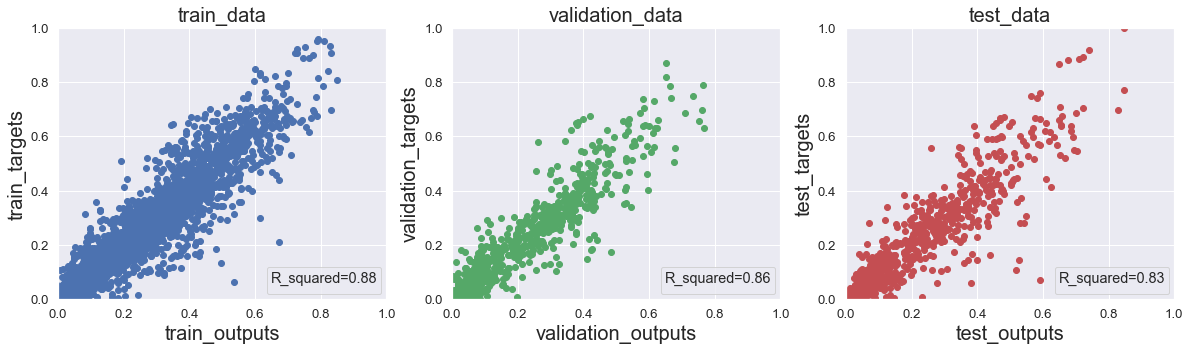

In [138]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.scatter(train_outputs,train_targets,c='b')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_title('train_data',fontsize=20)
ax1.set_xlabel('train_outputs',fontsize=20)
ax1.set_ylabel('train_targets',fontsize=20)
ax1.legend(loc='lower right',title=f'R_squared={r2_score(train_outputs,train_targets).round(2)}',fontsize=10,labels='')


ax2.scatter(validation_outputs,validation_targets,c='g')
ax2.set_title('validation_data',fontsize=20)
ax2.set_xlabel('validation_outputs',fontsize=20)
ax2.set_ylabel('validation_targets',fontsize=20)
ax2.legend(loc='lower right',title=f'R_squared={r2_score(validation_outputs,validation_targets).round(2)}',fontsize=10,labels='')
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)

ax3.scatter(test_outputs,test_targets,c='r')
ax3.set_title('test_data',fontsize=20)
ax3.set_xlabel('test_outputs',fontsize=20)
ax3.set_ylabel('test_targets',fontsize=20)
ax3.legend(loc='lower right',title=f'R_squared={r2_score(test_outputs,test_targets).round(2)}',fontsize=10,labels='')
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)


### Root mean square logarithmic error

In [139]:
real_train_outputs= s2.inverse_transform(train_outputs).astype(np.int32)
real_train_targets= s2.inverse_transform(train_targets).astype(np.int32)
real_train_outputs= np.where(real_train_outputs<0,0,real_train_outputs)
mean_squared_log_error(real_train_targets, real_train_outputs)

0.48281693956779986

#### validation_data

In [140]:
real_validation_outputs= s2.inverse_transform(validation_outputs).astype(np.int32)
real_validation_targets= s2.inverse_transform(validation_targets).astype(np.int32)
real_validation_outputs= np.where(real_validation_outputs<0,0,real_validation_outputs)
mean_squared_log_error(real_validation_targets, real_validation_outputs)

0.5551210700214197

#### test_data

In [141]:
real_test_outputs= s2.inverse_transform(test_outputs).astype(np.int32)
real_test_targets= s2.inverse_transform(test_targets).astype(np.int32)
real_test_outputs= np.where(real_test_outputs<0,0,real_test_outputs)
mean_squared_log_error(real_test_targets, real_test_outputs)

0.501843707715327

In [126]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               1500      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


### Model Saving

In [78]:
model.save('model_1.h5') 

In [79]:
model = tf.keras.models.load_model('model_1.h5')

### Significance test for neural network model
### Based on partial drivative

In [80]:
names=list(train_data.columns)
names=names[:len(names)]
names

['Hour',
 'Temperature(�C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(�C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_No Holiday',
 'Functioning Day_Yes']

In [81]:
w=[]
b={}
inp=train_inputs
inp = tf.Variable(inp, dtype=tf.float32)

with tf.GradientTape() as tape:
    preds = model(inp)
grads = np.squeeze(tape.gradient(preds, inp))

for i in range(train_data.shape[1]):
    a=sum((grads[:,i])**2)/(train_inputs.shape[0])
    w.append(a.round(5))
for i in range(train_data.shape[1]):
    b[names[i]]=w[i]
print(b)

{'Hour': 0.59865, 'Temperature(�C)': 0.14776, 'Humidity(%)': 0.08862, 'Wind speed (m/s)': 0.01645, 'Visibility (10m)': 0.00831, 'Dew point temperature(�C)': 0.07908, 'Solar Radiation (MJ/m2)': 1.59657, 'Rainfall(mm)': 8.86219, 'Snowfall (cm)': 0.03819, 'Seasons_Spring': 0.03135, 'Seasons_Summer': 0.04231, 'Seasons_Winter': 0.03384, 'Holiday_No Holiday': 0.01936, 'Functioning Day_Yes': 0.05643}


In [82]:
t=[(i/sum(w)).round(3) for i in w]
print(t)

[0.052, 0.013, 0.008, 0.001, 0.001, 0.007, 0.137, 0.763, 0.003, 0.003, 0.004, 0.003, 0.002, 0.005]


In [83]:
t=[]
for i in w:
    t.append((i/sum(w)).round(3))
print(t)

[0.052, 0.013, 0.008, 0.001, 0.001, 0.007, 0.137, 0.763, 0.003, 0.003, 0.004, 0.003, 0.002, 0.005]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


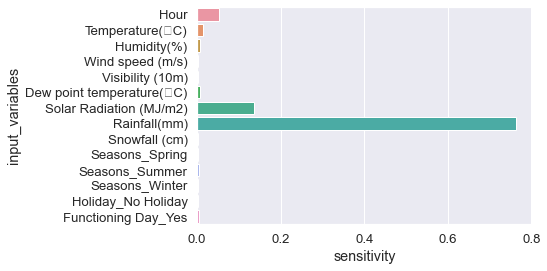

In [84]:
sns.set(font_scale = 1.2)
sns.barplot(x=t,y=names).set(xlabel='sensitivity',ylabel='input_variables')
plt.show()

### Generating predictions

In [58]:
predictions= s2.inverse_transform(model.predict(test_data_scaled))

In [59]:
predictions=predictions.astype(np.int32)

In [60]:
predictions.shape

(3000, 1)

In [61]:
id=list(test_data.index)

In [62]:
pred= pd.DataFrame()
pred['ID']=id
pred['y']=predictions
pred

,ID,y
0,5760,147
1,5761,100
2,5762,74
3,5763,39
4,5764,51
...,...,...
2995,8755,922
2996,8756,853
2997,8757,767
2998,8758,718


### Predictions may have some negative values for y which doesn't make sense

In [63]:
pred.describe()

,ID,y
count,3000.000000,3000.000000
mean,7259.500000,743.871000
std,866.169729,587.001702
min,5760.000000,-91.000000
25%,6509.750000,257.000000
50%,7259.500000,564.500000
75%,8009.250000,1122.250000
max,8759.000000,2861.000000


In [64]:
sum(pred['y']<0)

2

### We have some negative values! Let's replace them by zero

In [65]:
pred['y'][pred['y']<0]=0

<ipython-input-65-6bf92c6ab8d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['y'][pred['y']<0]=0


In [66]:
sum(pred['y']<0)

0

In [67]:
pred.describe()

,ID,y
count,3000.000000,3000.000000
mean,7259.500000,743.909667
std,866.169729,586.950153
min,5760.000000,0.000000
25%,6509.750000,257.000000
50%,7259.500000,564.500000
75%,8009.250000,1122.250000
max,8759.000000,2861.000000


In [68]:
d=pred[['y']]

In [69]:
d['function_day']=df_test['Functioning Day']

In [70]:
d[d['function_day']=='No']['y']

2424    38
2425    33
2426    24
2427    16
2428    10
2429    21
2430    30
2431    24
2432    17
2433    17
2434    23
2435    30
2436    35
2437    36
2438    38
2439    31
2440    22
2441    24
2442    37
2443    43
2444    40
2445    30
2446    26
2447    44
2472    31
2473    19
2474    11
2475     3
2476     4
2477     5
2478    16
2479    25
2480    14
2481    20
2482    10
2483     9
2484     0
2485    14
2486    16
2487     0
2488     2
2489    12
2490    47
2491    74
2492    80
2493    36
2494    56
2495    16
Name: y, dtype: int32

### Exporting csv submission file

In [ ]:
pred.to_csv('sub.csv',index=False)